In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
import math
from scipy.signal import butter, lfilter, freqz,cheby1,cheby2,freqs
from scipy.fft import fft, fftfreq,ifft,fftshift
from google.colab import files
import io

# **Upload data**

In [ ]:
filename="run10.xlsx"
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded[filename]), header = 0)
vib_table=df.vibrat

Saving run10.xlsx to run10.xlsx


In [ ]:
filename="run10_spin.xlsx"
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded[filename]), header = 0)
vib_spin=df.vibrat

Saving run10_spin.xlsx to run10_spin.xlsx


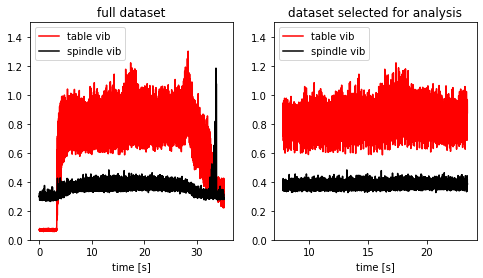

In [ ]:
fs=256
t=np.linspace(0,len(vib_spin)*(1/fs),len(vib_spin))

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax1.plot(t,vib_table,'r-',label='table vib')
ax1.plot(t,vib_spin,'k-',label='spindle vib')
ax1.set_title('full dataset')
ax1.legend(loc='upper left')
ax1.set_xlabel('time [s]')
ax1.set_ylim(0,1.5)

time=t[2000:6000]
spin=vib_spin[2000:6000]
table=vib_table[2000:6000]
ax2=fig.add_subplot(1,2,2)
ax2.plot(time,table,'r-',label='table vib')
ax2.plot(time,spin,'k-',label='spindle vib')
ax2.set_title('dataset selected for analysis')
ax2.legend(loc='upper left')
ax2.set_xlabel('time [s]')
ax2.set_ylim(0,1.5)
plt.savefig('mill_time.png',dpi=300)

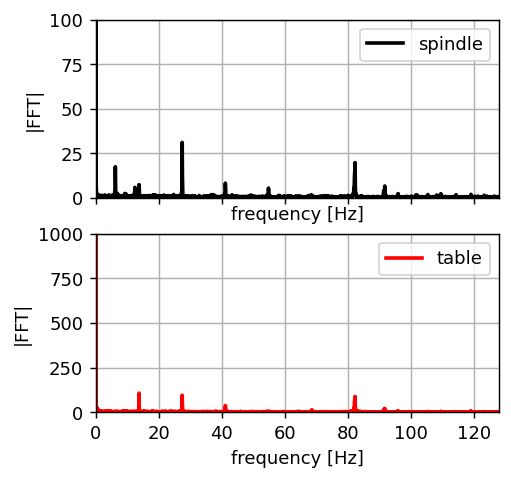

In [ ]:
dt=1/fs

yfs = fft(np.array(spin))
xfs = fftfreq(yfs.size, dt)

yft = fft(np.array(table))
xft = fftfreq(yft.size, dt)

fig, axes = plt.subplots(2,1, dpi=130, figsize=(4,4), sharex=True)
axes[0].plot(fftshift(xfs), np.absolute(fftshift(yfs)),'k',lw=2,label='spindle')
axes[0].legend()
axes[0].set_xlim(0,128)
axes[0].set_ylim(0,100)
axes[0].set_xlabel("frequency [Hz]")
axes[0].set_ylabel("|FFT|")
axes[0].grid()

axes[1].plot(fftshift(xft), np.absolute(fftshift(yft)),'r',lw=2,label='table')
axes[1].legend()
axes[1].set_xlim(0,128)
axes[1].set_ylim(0,1000)
axes[1].set_xlabel("frequency [Hz]")
axes[1].set_ylabel("|FFT|")
axes[1].grid()

plt.savefig('fft.png',dpi=300)

RMS amplitude spindle=0.014
RMS amplitude table=0.069


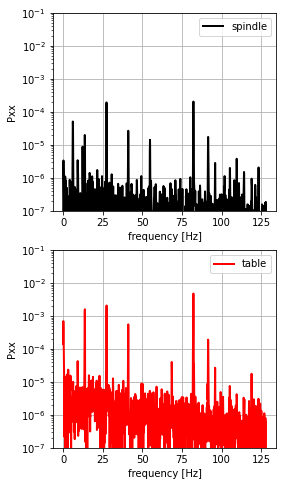

In [ ]:
f_spin, Pxx_spin = signal.periodogram(spin, fs,'flattop', scaling='spectrum')
f_table, Pxx_table = signal.periodogram(table, fs,'flattop', scaling='spectrum')

fig=plt.figure(figsize=(4,8))
ax1=fig.add_subplot(211)
ax1.semilogy(f_spin,(Pxx_spin),'k',lw=2,label='spindle')
ax1.set_ylim([1e-7, 1e-1])
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('Pxx')
ax1.legend()
ax1.grid()
print(f"RMS amplitude spindle={np.round(np.sqrt(Pxx_spin.max()),3)}")

ax2=fig.add_subplot(212)
ax2.semilogy(f_table,(Pxx_table),'r',lw=2,label='table')
ax2.set_ylim([1e-7, 1e-1])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('Pxx')
ax2.legend()
ax2.grid()
print(f"RMS amplitude table={np.round(np.sqrt(Pxx_table.max()),3)}")

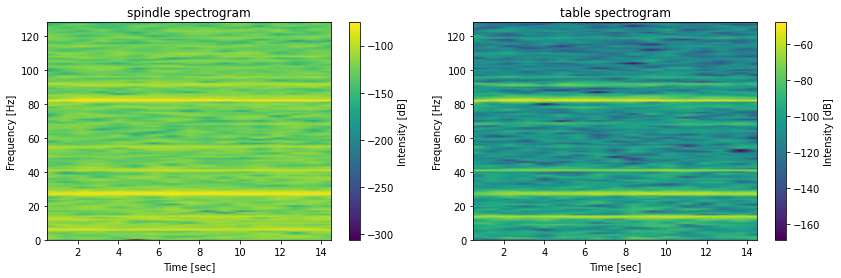

In [ ]:
f_spin, t_spin, Sxx_spin = signal.spectrogram(spin, fs)
f_table, t_table, Sxx_table = signal.spectrogram(table, fs)

fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
im1=ax1.pcolormesh(t_spin, f_spin, 20*np.log10(Sxx_spin), shading='gouraud')
ax1.set_title("spindle spectrogram")
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
fig.colorbar(im1).set_label('Intensity [dB]')


ax2=fig.add_subplot(122)
im2=ax2.pcolormesh(t_table, f_table, 20*np.log10(Sxx_table), shading='gouraud')
ax2.set_title("table spectrogram")
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
fig.colorbar(im2).set_label('Intensity [dB]')

plt.savefig("spectrogram.png",dpi=300)